<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier Brito Parra</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Generar una imagen de una función trigronométrica (función bidimensional) 
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal. 


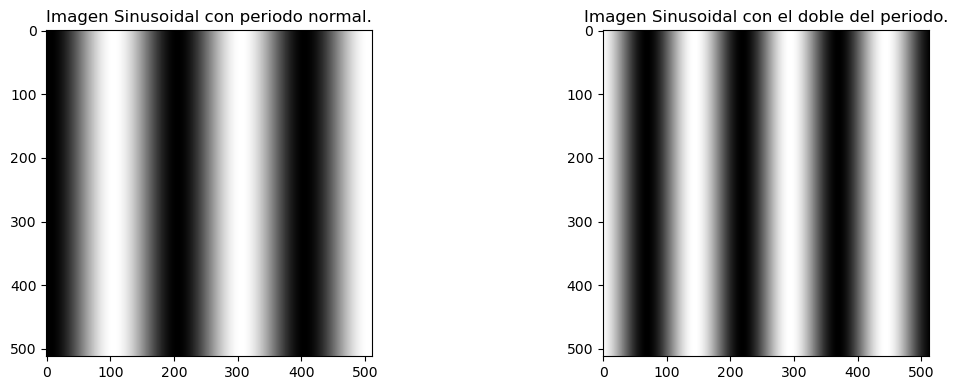

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-256, 256, 1)
X, Y = np.meshgrid(x, x)## Se hace un arreglo bidimensional
## El cual sera un arreglo de 2 dimensiones
periodo = 200 ## Cambiando este parametro la onda tendra un periodo mas corto o largo
img_sin = np.sin(2*np.pi*X/periodo)
img_sin_2p = np.sin(2*np.pi*X/150)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Imagen Sinusoidal con periodo normal.")
plt.set_cmap("gray")
plt.imshow(img_sin)
plt.subplot(1,2,2)
plt.title("Imagen Sinusoidal con el doble del periodo.")
plt.set_cmap("gray")
plt.imshow(img_sin_2p)

plt.tight_layout()
plt.show()

## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


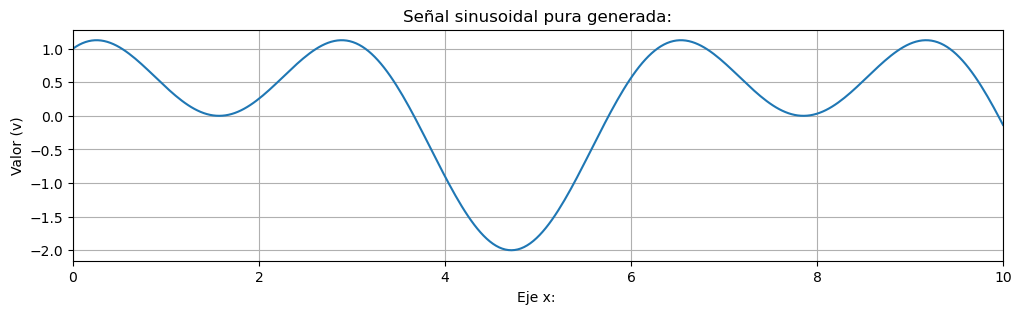

In [2]:
def signal(x):
    return np.sin(x)+np.cos(2*x)
xvector = np.linspace(0,10,300)

plt.figure(figsize=(12,3))
plt.plot(xvector,signal(xvector))
plt.title('Señal sinusoidal pura generada:')
plt.xlabel('Eje x: ')
plt.ylabel('Valor (v)')
plt.xlim(0,10)
plt.grid(True)
plt.show()

### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

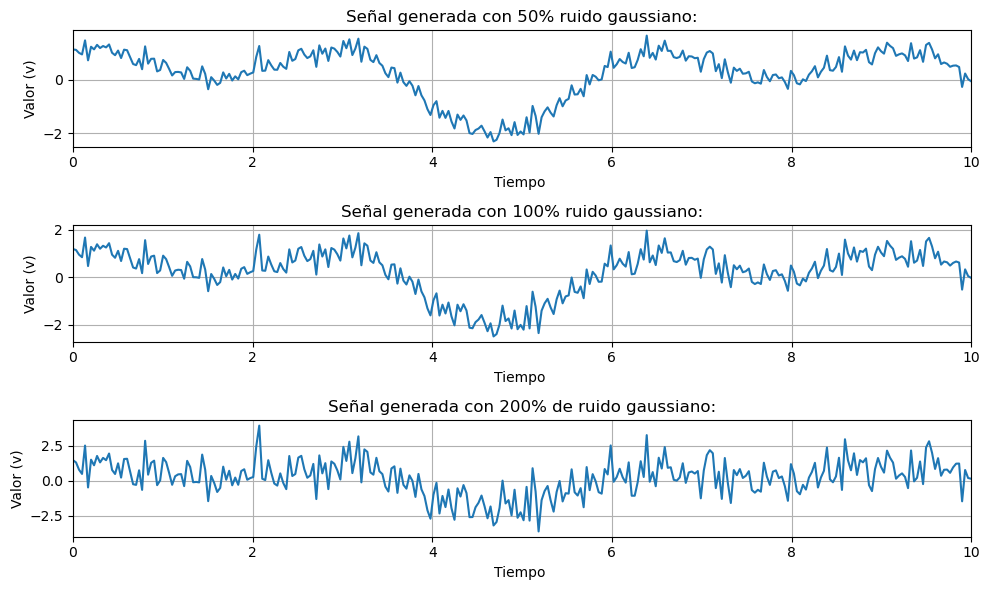

In [3]:
# Funcion que genera ruido mediante iteraciones:
def ruido_gaussiano(media, desviacion, tamaño_vector):
    ruido = np.zeros(tamaño_vector)
    for i in range(tamaño_vector[0]):
       ruido[i] = np.random.normal(media, desviacion)
    return ruido 

fun_sin = signal(xvector)
ruido_gauss = ruido_gaussiano(0,0.5,(len(fun_sin),1))
signalnoise_50 = fun_sin+0.5*ruido_gauss[:,0] ## Señal con 50% de ruido
signalnoise_100 = fun_sin+0.8*ruido_gauss[:,0] ## Señal con 100% de ruido
signalnoise_200 = fun_sin+2*ruido_gauss[:,0] ## Señal con 200% de ruido


plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(xvector,signalnoise_50)
plt.title('Señal generada con 50% ruido gaussiano:')
plt.xlabel('Tiempo ')
plt.ylabel('Valor (v)')
plt.xlim(0,10)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(xvector,signalnoise_100)
plt.title('Señal generada con 100% ruido gaussiano:')
plt.xlabel('Tiempo ')
plt.ylabel('Valor (v)')
plt.xlim(0,10)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(xvector,signalnoise_200)
plt.title('Señal generada con 200% de ruido gaussiano:')
plt.xlabel('Tiempo ')
plt.ylabel('Valor (v)')
plt.xlim(0,10)
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


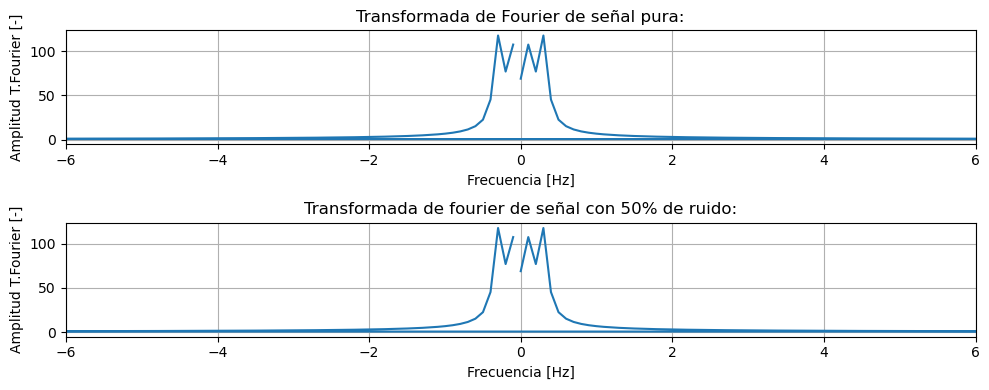

In [4]:
freq_fft = np.fft.fftfreq(len(xvector),xvector[1]-xvector[0] )
fft_signal = np.fft.fft(signal(xvector))## Transformada de fourier de la señal pura
fft_signal_noise= np.fft.fft(signalnoise_50)## Transformada de fourier de la señal contaminada con 50% de ruido

plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)  
plt.plot(freq_fft, np.abs(fft_signal))
plt.title('Transformada de Fourier de señal pura:')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud T.Fourier [-]')
plt.xlim(-6,6)
plt.grid(True)

plt.subplot(2, 1, 2)  
plt.plot(freq_fft, np.abs(fft_signal))
plt.title('Transformada de fourier de señal con 50% de ruido:')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud T.Fourier [-]')
plt.xlim(-6,6)
plt.grid(True)

plt.tight_layout()
plt.show()

* Adicionalmente se realizo la transformada de fourier a la señal con 200% de ruido.

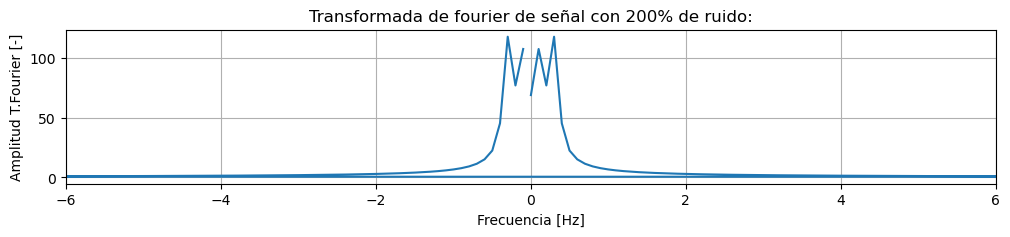

In [5]:
fft_signal_noise_200= np.fft.fft(signalnoise_200)## Transformada de fourier de la señal con 200% de ruido
                                                 ## El objetivo de hacer esta transformada extra, es para comprobar si a un ruido
                                                 ## mayor habra algun cambio en el dominio de la frecuencia.
plt.figure(figsize=(12, 2))
plt.plot(freq_fft, np.abs(fft_signal))
plt.title('Transformada de fourier de señal con 200% de ruido:')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud T.Fourier [-]')
plt.xlim(-6,6)
plt.grid(True)
plt.show()

* Se comprobo que las frecuencias mas significativas son practicamente iguales pese al ruido adicional agregado.

### 3.2 Obten un resultado Normalizado: 
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

* Resultado normalizado: Consiste en cambiar la escala de medida para entender mejor los datos,
  algo similar a lo que ocurre en audio, cuando se utiliza la escala logaritmica para ver el grafico en veces.

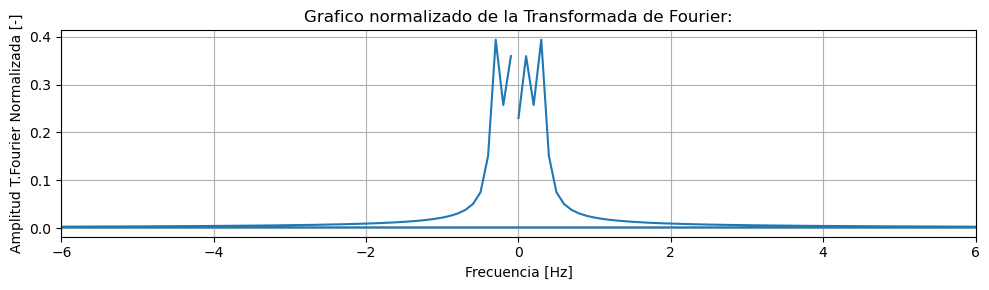

In [6]:
plt.figure(figsize=(10, 3))
plt.plot(freq_fft, np.abs(fft_signal/len(xvector)))
plt.title('Grafico normalizado de la Transformada de Fourier:')## Esto se realizo para la señal pura
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud T.Fourier Normalizada [-]')
plt.xlim(-6,6)
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

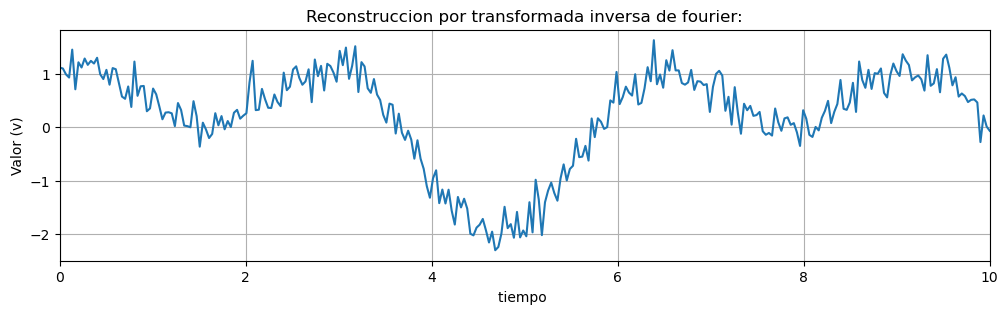

In [7]:
## Transformada inversa de Fourier.
inversa = np.fft.ifft(fft_signal_noise)## np.fft.ifft(arg) // realiza la operacion matematica de la transformada - 
                                       ##                  // rapida inversa de fourier.
plt.figure(figsize=(12,3))             ##                  // (inverse fast fourier transform.)
plt.plot(xvector,np.real(inversa))     ##   np.real(arg)   // devuelve el valor real de una variable del tipo complex
plt.title('Reconstruccion por transformada inversa de fourier:')
plt.xlabel('tiempo ')
plt.ylabel('Valor (v)')
plt.xlim(0,10)
plt.grid(True)
plt.show()

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo 
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

### Conclusiones:

* Las amplitudes de la parte real de la transformada de fourier representan la concentracion de energia o datos, esto dependiendo del contexto en el que se ocupe la transformada, por ejemplo en el contexto del procesamiento de imagenes estos picos indican la contribucion de frecuencias de la imagen original.

* Se pudo comprobar que el ruido, al ser del tipo gaussiano seguira una distribucion normal bastante aleatoria, la señal pese a estar contaminada en el dominio de la frecuencia se observa un espectro muy similar.

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html